You now know two kinds of regression and two kinds of classifiers. So now, you're ready to start using them to compare models!

Comparing models is something that data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation—so learning to choose the best one is very important.

In this checkpoint, you'll work on regression. Find a dataset and build a KNN regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter Notebook with your models. At the end, in a Markdown cell, write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your Notebook below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import neighbors
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
import statsmodels.api as sm

%matplotlib inline

In [2]:
park_df = pd.read_csv('data/parkinsons.csv')

In [3]:
park_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
park_df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
park_df['MDVP:Shimmer'].describe()

count    195.000000
mean       0.029709
std        0.018857
min        0.009540
25%        0.016505
50%        0.022970
75%        0.037885
max        0.119080
Name: MDVP:Shimmer, dtype: float64

In [7]:
park_df['Jitter:DDP'].describe()

count    195.000000
mean       0.009920
std        0.008903
min        0.002040
25%        0.004985
50%        0.007490
75%        0.011505
max        0.064330
Name: Jitter:DDP, dtype: float64

In [8]:
park_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

## KNN Regression

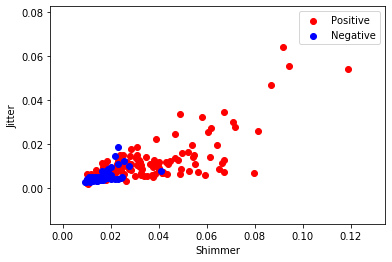

In [9]:
# Look at our data.
plt.scatter(
    park_df[park_df['status'] == 1]['MDVP:Shimmer'],
    park_df[park_df['status'] == 1]['Jitter:DDP'],
    color='red'
)
plt.scatter(
    park_df[park_df['status'] == 0]['MDVP:Shimmer'],
    park_df[park_df['status'] == 0]['Jitter:DDP'],
    color='blue'
)
plt.legend(['Positive', 'Negative'])
plt.xlabel('Shimmer')
plt.ylabel('Jitter')
plt.show()

## Test it against the SKLearn package

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
X = park_df[['MDVP:Shimmer', 'Jitter:DDP']]
Y = park_df['status']
knn.fit(X,Y)

print(knn.predict([[0.02, 0.01]]))
print(knn.predict_proba([[0.02, 0.01]]))

[1]
[[0.3 0.7]]


## Add weights

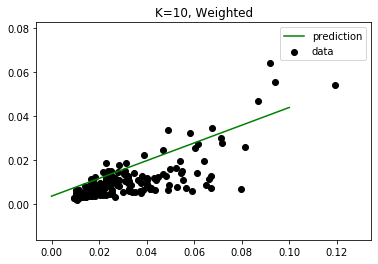

In [11]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = park_df[['MDVP:Shimmer']]
Y = park_df['Jitter:DDP']
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 0.12, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [12]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: nan (+/- nan)
Weighted Accuracy: 0.40 (+/- 0.25)


C:\Users\Steve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Steve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Steve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Steve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-

## OLS Regression

In [13]:
X = park_df[['MDVP:Shimmer', 'Jitter:DDP']]
y = park_df['status']

lrm = linear_model.LinearRegression()

lrm.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 8.92658333 -1.42594872]

Intercept: 
 0.5027904835664054


In [14]:
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 status   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     15.03
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           8.62e-07
Time:                        15:28:15   Log-Likelihood:                -98.286
No. Observations:                 195   AIC:                             202.6
Df Residuals:                     192   BIC:                             212.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5028      0.054      9.282      0.000       0.396       0.610
MDVP:Shimmer     8.9266      2.363      3.778      0.000       4.266      13.587
Jitter:DDP      -1.4259      5.005     -0.285      0.776     -11.297       8.445
==============================================================================
Omnibus:                       47.904   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.759
Skew:                          -0.824   Prob(JB):                     3.45e-07
Kurtosis:                       2.027   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1) KNN seems to be the better choice.  It has a very good pattern, and fairly good accuracy

### 2) OLS has an R-squared value of only about 13%, not good

### 3) Shimmer seems to be the better predictor